In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import chi2
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx

pd.options.display.max_rows = 100

In [125]:
data = pd.read_csv("./cojo-robustness/data/test_diff_r.tsv", sep='\t')
data = data.round({'r': 3})
data["lg_p1"] = -np.log10(data["p1"])
data["lg_p1_tool"] = -np.log10(data["p1_tool"])
data["lg_p2"] = -np.log10(data["p2"])
data["lg_p2_tool"] = -np.log10(data["p2_tool"])
data.head()

,r,beta1,se1,p1,beta2,se2,p2,beta1_tool,se1_tool,p1_tool,beta2_tool,se2_tool,p2_tool,lg_p1,lg_p1_tool,lg_p2,lg_p2_tool
0,0.2,0.025102,0.003229,7.680654e-15,0.004857,0.003229,0.132569,0.025103,0.003224,6.964350e-15,0.005072,0.003225,0.115835,14.114602,14.157119,0.877558,0.936160
1,0.2,0.017556,0.003224,5.154231e-08,-0.005436,0.003224,0.091761,0.017440,0.003209,5.510100e-08,-0.005206,0.003222,0.106200,7.287836,7.258841,1.037342,0.973875
2,0.2,0.015808,0.003215,8.777082e-07,-0.004952,0.003215,0.123442,0.015719,0.003209,9.636440e-07,-0.004764,0.003208,0.137468,6.056650,6.016083,0.908538,0.861798
3,0.2,0.015463,0.003222,1.591230e-06,-0.000911,0.003222,0.777427,0.015413,0.003213,1.607360e-06,-0.000709,0.003215,0.825569,5.798267,5.793887,0.109341,0.083247
4,0.2,0.016015,0.003228,7.005194e-07,-0.004661,0.003228,0.148716,0.015892,0.003218,7.891640e-07,-0.004389,0.003218,0.172621,6.154580,6.102833,0.827642,0.762906


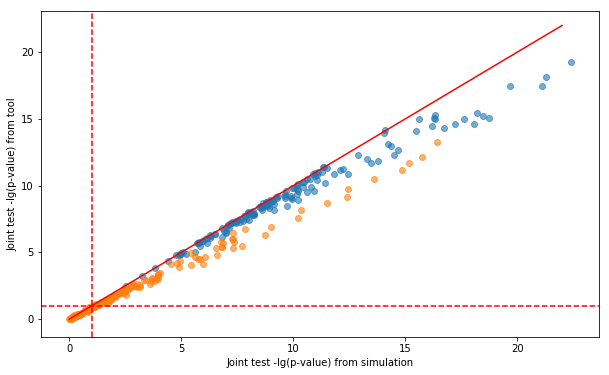

In [137]:
fig, ax = plt.subplots(1, figsize=(10, 6))

x = np.linspace(-0.0, 22, 1000)
ax.plot(x, x, color='red')

model = smf.ols("lg_p1_tool ~ lg_p1", data=data).fit()
print(model)
# ax.scatter(x=data["p1"], y=data["p1_tool"])
# ax.scatter(x=data["p1"], y=data["p2_tool"])

ax.scatter(x=data["lg_p1"], y=data["lg_p1_tool"], alpha=0.6)
ax.scatter(x=data["lg_p2"], y=data["lg_p2_tool"], alpha=0.6)

ax.set_xlabel("Joint test -lg(p-value) from simulation")
ax.set_ylabel("Joint test -lg(p-value) from tool")

ax.axvline(x=1.0, color='red', linestyle='--')
ax.axhline(y=1.0, color='red', linestyle='--')

plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/joint_tool_vs_sim.png", dpi=300)
plt.show()
plt.close()

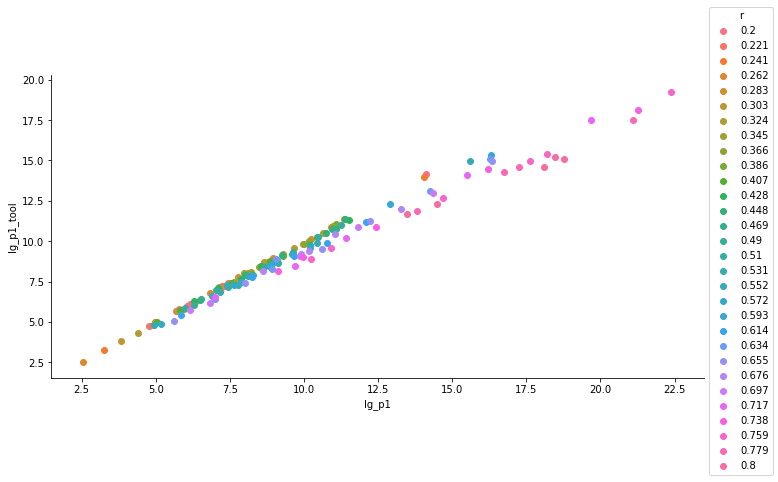

In [127]:
fg = sns.FacetGrid(data=data, hue='r', aspect=2, size=5)
fg.map(plt.scatter, 'p1', 'p1_tool').add_legend()
plt.show()
plt.close()

In [282]:
implementation_testing = pd.read_csv("./cojo-robustness/data/testing_joint_implementation.tsv", sep='\t')
implementation_testing.head()

,beta1_multiple,beta1_sim,beta1_single,beta1_tool,beta2_multiple,beta2_sim,beta2_single,beta2_tool,p1_multiple,p1_sim,...,pJ_sim,pJ_tool,se1_multiple,se1_sim,se1_single,se1_tool,se2_multiple,se2_sim,se2_single,se2_tool
0,0.013830,0.013695,0.001916,0.012505,-0.019576,-0.019598,-0.011367,-0.018390,0.269231,0.270911,...,0.283747,-1,0.012517,0.012439,0.010004,0.012162,0.012361,0.012439,0.009879,0.012011
1,0.010591,0.010582,0.004480,0.009739,-0.010145,-0.010156,-0.003798,-0.009286,0.396601,0.396387,...,0.649116,-1,0.012493,0.012477,0.009987,0.012102,0.012461,0.012477,0.009962,0.012072
2,0.001960,0.001814,-0.009609,0.000970,-0.019051,-0.018974,-0.017881,-0.018429,0.874982,0.883696,...,0.193832,-1,0.012457,0.012403,0.009946,0.012097,0.012350,0.012403,0.009860,0.011994
3,0.004518,0.004556,0.006384,0.004546,0.003093,0.003051,0.005781,0.003231,0.718083,0.714812,...,0.790954,-1,0.012513,0.012469,0.010016,0.012138,0.012424,0.012469,0.009945,0.012052
4,0.004481,0.004494,0.008434,0.004712,0.006667,0.006656,0.009316,0.006711,0.718824,0.717844,...,0.608155,-1,0.012445,0.012436,0.010029,0.012045,0.012427,0.012436,0.010014,0.012027


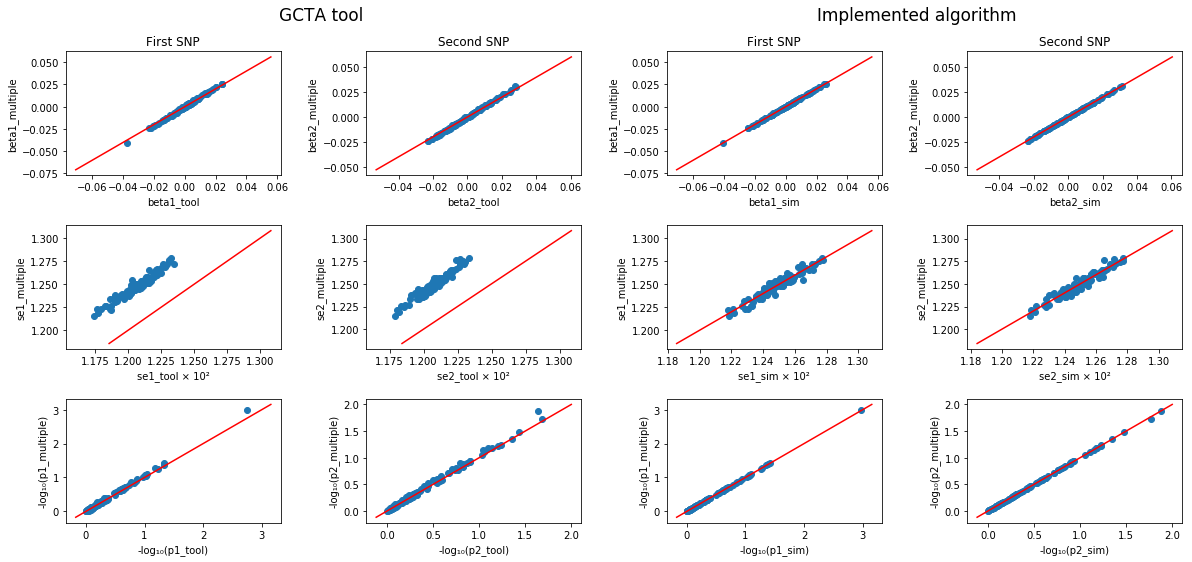

In [283]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))

fig.subplots_adjust(top=0.78, wspace=0.4, hspace=0.4)

axes[0][0].set_title("First SNP")
axes[0][1].set_title("Second SNP")
axes[0][2].set_title("First SNP")
axes[0][3].set_title("Second SNP")

plt.figtext(0.3025, 0.83, "GCTA tool", va="center", ha="center", size=17)
axes[0][0].scatter(y=implementation_testing["beta1_multiple"], x=implementation_testing["beta1_tool"])
x = np.linspace(axes[0][0].get_ylim()[0], axes[0][0].get_ylim()[1], 100)
axes[0][0].plot(x, x, color='red')
axes[0][0].set_ylabel("beta1_multiple")
axes[0][0].set_xlabel("beta1_tool")
axes[0][1].scatter(y=implementation_testing["beta2_multiple"], x=implementation_testing["beta2_tool"])
x = np.linspace(axes[0][1].get_ylim()[0], axes[0][1].get_ylim()[1], 100)
axes[0][1].plot(x, x, color='red')
axes[0][1].set_ylabel("beta2_multiple")
axes[0][1].set_xlabel("beta2_tool")
axes[1][0].scatter(y=implementation_testing["se1_multiple"] * 100, x=implementation_testing["se1_tool"] * 100)
x = np.linspace(axes[1][0].get_ylim()[0], axes[1][0].get_ylim()[1], 100)
axes[1][0].plot(x, x, color='red')
axes[1][0].set_ylabel("se1_multiple")
axes[1][0].set_xlabel("se1_tool \u2A2F 10\u00B2")
axes[1][1].scatter(y=implementation_testing["se2_multiple"] * 100, x=implementation_testing["se2_tool"] * 100)
x = np.linspace(axes[1][1].get_ylim()[0], axes[1][1].get_ylim()[1], 100)
axes[1][1].plot(x, x, color='red')
axes[1][1].set_ylabel("se2_multiple")
axes[1][1].set_xlabel("se2_tool \u2A2F 10\u00B2")
axes[2][0].scatter(y=-np.log10(implementation_testing["p1_multiple"]), x=-np.log10(implementation_testing["p1_tool"]))
x = np.linspace(axes[2][0].get_ylim()[0], axes[2][0].get_ylim()[1], 100)
axes[2][0].plot(x, x, color='red')
axes[2][0].set_ylabel("-log\u2081\u2080(p1_multiple)")
axes[2][0].set_xlabel("-log\u2081\u2080(p1_tool)")
axes[2][1].scatter(y=-np.log10(implementation_testing["p2_multiple"]), x=-np.log10(implementation_testing["p2_tool"]))
x = np.linspace(axes[2][1].get_ylim()[0], axes[2][1].get_ylim()[1], 100)
axes[2][1].plot(x, x, color='red')
axes[2][1].set_ylabel("-log\u2081\u2080(p2_multiple)")
axes[2][1].set_xlabel("-log\u2081\u2080(p2_tool)")

plt.figtext(0.716, 0.83, "Implemented algorithm", va="center", ha="center", size=17)
axes[0][2].scatter(y=implementation_testing["beta1_multiple"], x=implementation_testing["beta1_sim"])
x = np.linspace(axes[0][2].get_ylim()[0], axes[0][2].get_ylim()[1], 100)
axes[0][2].plot(x, x, color='red')
axes[0][2].set_ylabel("beta1_multiple")
axes[0][2].set_xlabel("beta1_sim")
axes[0][3].scatter(y=implementation_testing["beta2_multiple"], x=implementation_testing["beta2_sim"])
x = np.linspace(axes[0][3].get_ylim()[0], axes[0][3].get_ylim()[1], 100)
axes[0][3].plot(x, x, color='red')
axes[0][3].set_ylabel("beta2_multiple")
axes[0][3].set_xlabel("beta2_sim")
axes[1][2].scatter(y=implementation_testing["se1_multiple"] * 100, x=implementation_testing["se1_sim"] * 100)
x = np.linspace(axes[1][2].get_ylim()[0], axes[1][2].get_ylim()[1], 100)
axes[1][2].plot(x, x, color='red')
axes[1][2].set_ylabel("se1_multiple")
axes[1][2].set_xlabel("se1_sim \u2A2F 10\u00B2")
axes[1][3].scatter(y=implementation_testing["se2_multiple"] * 100, x=implementation_testing["se2_sim"] * 100)
x = np.linspace(axes[1][3].get_ylim()[0], axes[1][3].get_ylim()[1], 100)
axes[1][3].plot(x, x, color='red')
axes[1][3].set_ylabel("se2_multiple")
axes[1][3].set_xlabel("se2_sim \u2A2F 10\u00B2")
axes[2][2].scatter(y=-np.log10(implementation_testing["p1_multiple"]), x=-np.log10(implementation_testing["p1_sim"]))
x = np.linspace(axes[2][2].get_ylim()[0], axes[2][2].get_ylim()[1], 100)
axes[2][2].plot(x, x, color='red')
axes[2][2].set_ylabel("-log\u2081\u2080(p1_multiple)")
axes[2][2].set_xlabel("-log\u2081\u2080(p1_sim)")
axes[2][3].scatter(y=-np.log10(implementation_testing["p2_multiple"]), x=-np.log10(implementation_testing["p2_sim"]))
x = np.linspace(axes[2][3].get_ylim()[0], axes[2][3].get_ylim()[1], 100)
axes[2][3].plot(x, x, color='red')
axes[2][3].set_ylabel("-log\u2081\u2080(p2_multiple)")
axes[2][3].set_xlabel("-log\u2081\u2080(p2_sim)")

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)
plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/implementation_testing.png", dpi=300)
plt.show()
plt.close()

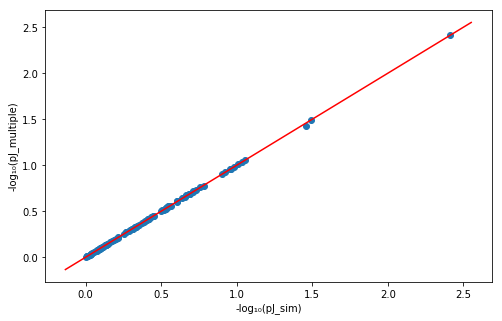

In [284]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(y=-np.log10(implementation_testing["pJ_multiple"]), x=-np.log10(implementation_testing["pJ_sim"]))

x = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 100)
ax.plot(x, x, color='red')
ax.set_xlabel("-log\u2081\u2080(pJ_sim)")
ax.set_ylabel("-log\u2081\u2080(pJ_multiple)")

plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/implementation_testing_pjoint.png", dpi=300)
plt.show()
plt.close()

In [281]:
distr_p_value = pd.read_csv("./cojo-robustness/data/distr_p_value", sep='\t')
distr_p_value.head()

,pJ_multiple,pJ_sim
0,6.408339e-07,4.708823e-07
1,5.264996e-05,4.243736e-05
2,7.601336e-06,7.239127e-06
3,2.483355e-06,6.024167e-07
4,3.003941e-08,1.836967e-08


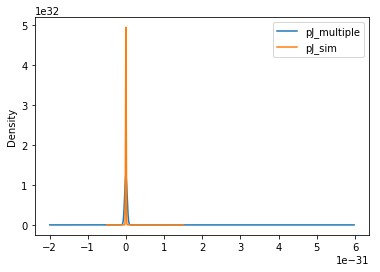

In [274]:
distr_p_value.plot(kind='kde')
plt.show()

In [261]:
print("Multiple regression \n first type error =", sum(distr_p_value.pJ_multiple < 0.05) / 10, 
      "\n error of error =", np.sqrt(sum(distr_p_value.pJ_multiple < 0.05) * sum(distr_p_value.pJ_multiple >= 0.05)) / 1000)
print("Implemented algorithm \n first type error =", sum(distr_p_value.pJ_sim < 0.05) / 10,
      "\n error of error =", np.sqrt(sum(distr_p_value.pJ_sim < 0.05) * sum(distr_p_value.pJ_sim >= 0.05)) / 1000)

Multiple regression 
 first type error = 100.0 
 error of error = 0.0
Implemented algorithm 
 first type error = 100.0 
 error of error = 0.0


In [280]:
print("Multiple regression \n second type error =", sum(distr_p_value.pJ_multiple > 0.05) / 10, 
      "\n error of error =", np.sqrt(sum(distr_p_value.pJ_multiple <= 0.05) * sum(distr_p_value.pJ_multiple > 0.05)) / 1000)
print("Implemented algorithm \n second type error =", sum(distr_p_value.pJ_sim > 0.05) / 10,
      "\n error of error =", np.sqrt(sum(distr_p_value.pJ_sim <= 0.05) * sum(distr_p_value.pJ_sim > 0.05)) / 1000)

Multiple regression 
 second type error = 0.0 
 error of error = 0.0
Implemented algorithm 
 second type error = 0.0 
 error of error = 0.0


,first_type_error,ref_r
count,800.000000,800.000000
mean,0.396250,0.088590
std,0.556438,0.536028
min,0.000000,-0.771385
25%,0.000000,-0.352285
50%,0.000000,0.104865
75%,1.000000,0.600063
max,2.000000,0.866661


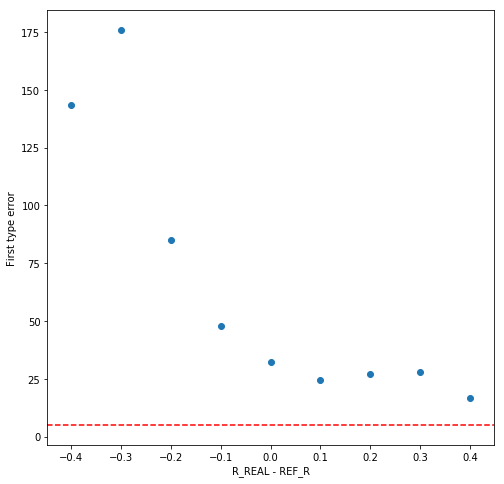

In [18]:
plotting_data = pd.read_csv("./cojo-robustness/out/plotting_data.tsv", sep='\t')
# first_type_error.ref_r.apply(float)
# first_type_error.joint_p.apply(float)
# plotting_data.describe()

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x=plotting_data.delta_r, y=plotting_data.first_type_error)

ax.set_xlabel("R_REAL - REF_R")
ax.set_ylabel("First type error")
ax.axhline(y=5.0, color='red', linestyle='--')

plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/first_type_error_vs_delta_r.png", dpi=300)
plt.show()
plt.close()

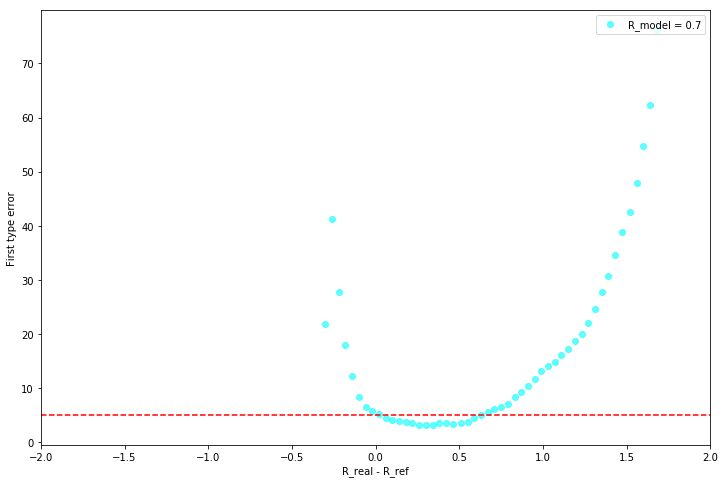

In [3]:
first_type_error = pd.read_csv("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/first_type_error.tsv", sep='\t')
NUMBER_OF_ITERATIONS = 1000
# first_type_error.ref_r.apply(float)
# first_type_error.joint_p.apply(float)

first_type_error = first_type_error.round({'delta_r': 2})

plotting_data = {"delta_r": [], "first_type_error": [], "sim_r": []}

for sim_r in first_type_error.sim_r.unique():
    first_type_error_sim_r = first_type_error[first_type_error.sim_r == sim_r]
    for delta_r_i in first_type_error_sim_r.delta_r.unique():
        # print(first_type_error[first_type_error["ref_r"] == float(ref_r_i)].joint_p < 0.05, end=' ')
        plotting_data["first_type_error"].append(
            sum(first_type_error_sim_r[first_type_error_sim_r.delta_r == float(delta_r_i)].joint_p < 0.05)
            / first_type_error_sim_r[first_type_error_sim_r.delta_r == float(delta_r_i)].shape[0] * 100)
        # print(sum(first_type_error[first_type_error["ref_r"] == float(ref_r_i)].joint_p < 0.05) / 1000 * 100)
        plotting_data["delta_r"].append(delta_r_i)
        plotting_data["sim_r"].append(sim_r)

plotting_data = pd.DataFrame.from_dict(plotting_data)

fig, ax = plt.subplots(figsize=(12, 8))

cool = cm = plt.get_cmap('cool') 
cNorm = colors.Normalize(vmin=0, vmax=len(first_type_error.sim_r.unique()))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cool)

# print(plotting_data.delta_r.describe())

for i, sim_r in enumerate(first_type_error.sim_r.unique()):
    color_value = scalarMap.to_rgba(i)
    plotting_data_sim_r = plotting_data[(plotting_data.sim_r == sim_r) &  
                                        (plotting_data.delta_r <= 1.0 + sim_r) &
                                        (plotting_data.delta_r >= -(1.0 - sim_r))]
    ax.scatter(x=plotting_data_sim_r.delta_r, 
               y=plotting_data_sim_r.first_type_error,
               c=scalarMap.to_rgba(i), 
               label="R_model = {sim_r}".format(sim_r=sim_r),
               alpha = 0.6)

ax.set_xlabel("R_real - R_ref")
ax.set_ylabel("First type error")

ax.set_xlim((-2.0, 2.00))

ax.axhline(y=5.0, color='red', linestyle='--')
plt.legend(loc=1)
plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/first_type_error_vs_delta_2.png", dpi=300)
plt.show()
plt.close()

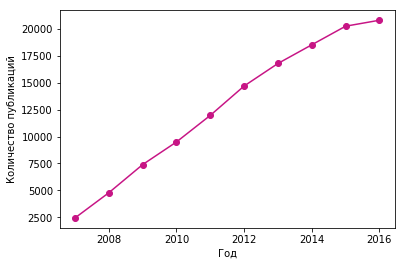

In [6]:
publications = {"year": range(2007, 2017, 1),
                "number_of_publications": [2433, 4777, 7394, 9500, 11972, 14702, 16798, 18534, 20264, 20818]}
publications = pd.DataFrame.from_dict(publications)

# fig, ax = plt.subplots(figsize=(6.5, 3))

# ax.plot(x=publications.year, y=publications.number_of_publications, zorder=1)
# ax.scatter(x=publications.year, y=publications.number_of_publications, zorder=2)

# ax.set_xlabel("Год")
# ax.set_ylabel("Количество публикаций")

plt.plot('year', 'number_of_publications', data=publications, marker='o', color='mediumvioletred')
plt.xlabel("Год")
plt.ylabel("Количество публикаций")

plt.savefig("/home/aleksandr/HiddenDesktop/Bachelor's work/cojo-robustness/out/publications_vs_year.png", dpi=300)
plt.show()
plt.close()